# Avaliação 2

```{admonition} Instruções
:class: tip

Os exercícios abaixo devem ser resolvidos e entregues em um arquivo único em formato PDF. Insira os
códigos que utilizar como anexo do mesmo arquivo PDF.
```

**Exercício 1 (1 ponto):** Defina os seguintes termos e dê exemplos:

a. Gramática dos Gráficos

A gramática dos gráficos é uma estrutura usada para construir visualizações. Esta estrutura tem como base os dados, a estética da apresentação, transformações de escala, formas geométricas, estatísticas, subconjuntos da visualização e o sistema de coordenadas. O objetivo é usar cada camada de forma sobreposta, fazendo com que cada camada possa conter uma ou mais dimensões. O exemplo visto durante o curso é o ggplot2 que tem funções de estética **aes()** para definir quais valores devem ser usados como eixos ou cor, funções para aplicar formas geométricas **geom_()** . Outro exemplo é a biblioteca Vega (https://vega.github.io/vega/) que tem uma abordagem declarativa usando JSON, a estética do gráfico é declarada na propriedade **axes** e as formas geométricas em **marks**

b. Dashboard

Um Dashboard é um painel composto por visualizações que, geralmente, fornecem informações amplas sobre um assunto ou estado, separando métricas em visualizações independentes que tem sentido individual, mas em conjunto podem ajudar o observador a entender o comportamento dos dados. Um exemplo é o painel de um carro onde cada item fornece uma informação sobre o estado atual do carro como velocidade e RPM do motor.

**Exercício 2 (3,0 pontos):** Dados sobre habitação e mercado imobiliário são de extrema relevância em diversos tipos de pesquisa. Considere um conjunto de dados sobre 506 setores censitários da cidade de Boston/EUA, no censo de 1970. Acesse-o em R via require(mlbench); data(BostonHousing); BostonHousing . Construa uma visualização de dados estática e de tamanho A4 sobre este conjunto de dados, sendo totalmente construída por meio de script (a visualização deve ser um output de um script). Considere os princípios de Excelência Gráfica de Tufte.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_boston
from plotly.subplots import make_subplots

# carrega o dataset e cria o dataframe
boston_dataset = load_boston()
colunas = boston_dataset.feature_names

#seleciona colunas
var_resposta = 'MEDV'
var_categorica_cor = 'CHAS'
var_quantitativas = [v for v in colunas if v not in [var_resposta, var_categorica_cor]]

#cria dataframe
boston_housing = pd.DataFrame(boston_dataset.data, columns=colunas)
boston_housing[var_resposta] = boston_dataset.target
boston_housing['CHAS'] = boston_housing['CHAS'].astype(int).astype('category')

# cria painel 12x1
painel = make_subplots(rows=len(var_quantitativas),
                       cols=1,
                       print_grid=False,
                       shared_xaxes=True,
                       vertical_spacing=.005,
                       x_title='Variável Resposta - MEDV')

# para cada var quantitativa, cria gráfico e adiciona ao painel
for i, variavel in enumerate(var_quantitativas):
    grafico = px.scatter(boston_housing, x=var_resposta, y=variavel, color=var_categorica_cor, marginal_y='box', trendline='ols')
    tracos = [grafico['data'][dimensao] for dimensao in range(len(grafico['data']))]
    [painel.append_trace(traco, row=i+1, col=1) for traco in tracos]
    painel.update_layout(**{f'yaxis{i+1}':dict(title=variavel)})

# arruma aparência do painel
painel.update_layout(height=1900,
                     width=1000,
                     title_text="Boston Housing Dataset",
                     legend=dict(title_text="CHAS", itemsizing='constant', orientation="h", yanchor="bottom", y=1, xanchor="right", x=1))
painel.update_traces(marker={'size': 3})
names = set()
painel.for_each_trace(
    lambda trace:
        trace.update(showlegend=False)
        if (trace.name in names) else names.add(trace.name))

# mostra painel
painel.show()

**Exercício 3 (3,0 pontos):** Crie um conjunto de dados sobre as 399 cidades do Paraná, relativo a qualquer temática (estatísticas por município sobre Saúde, Economia, Educação, Covid-19 etc). Crie mapas informativos sobre esse conjunto de dados e complemente-os com outros gráficos tradicionais. Algumas fontes de dados possíveis: localizasus.saude.gov.br, www.ipea.gov.br, cidades.ibge.gov.br, www.inep.gov.br, www.atlasbrasil.org.br.

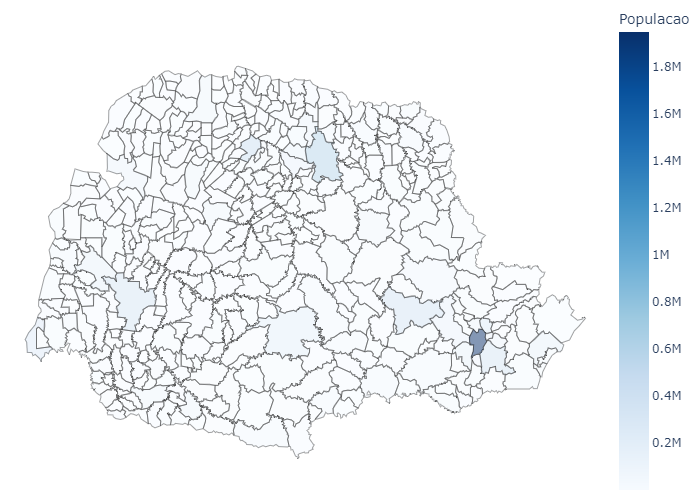

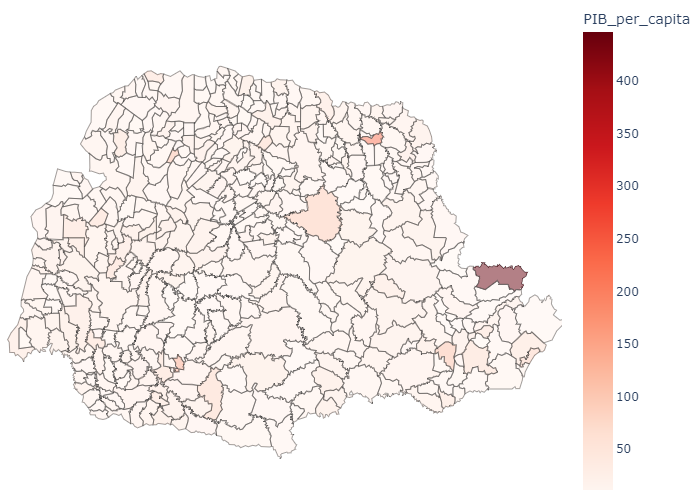

In [2]:
from urllib.request import urlopen
from IPython.display import display, Image
import json
import pandas as pd
import plotly.express as px

GEOJSON_PARANA = 'https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-41-mun.json'
with urlopen(GEOJSON_PARANA) as response:
    cidades_geo = json.load(response)

populacao_estimada = pd.read_csv('./dados/populacao_estimada.csv', delimiter=';')
pib = pd.read_csv('./dados/pib.csv')
cidades = pd.merge(populacao_estimada, pib, on='Cidade')
cidades['PIB_per_capita'] = cidades.PIB/cidades.Populacao

def criar_mapa(cor: str, escala_cor: str):
    fig = px.choropleth_mapbox(cidades, geojson=cidades_geo,
                               locations='Codigo', featureidkey="properties.id",
                               color=cor, color_continuous_scale=escala_cor,
                               mapbox_style="white-bg", zoom=5.9, center = {"lat": -24.5, "lon": -51.4}, opacity=0.5)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    return fig

mapa_populacao = criar_mapa('Populacao', 'Blues')
mapa_populacao.write_image("./imagens/mapa_parana_pop.png")
display(Image('./imagens/mapa_parana_pop.png'))
#mapa_populacao.show()

mapa_PIB_per_capita = criar_mapa('PIB_per_capita', 'Reds')
mapa_PIB_per_capita.write_image("./imagens/mapa_parana_pib_capita.png")
display(Image('./imagens/mapa_parana_pib_capita.png'))
#mapa_PIB_per_capita.show()

**Exercício 4 (3,0 pontos):** Os Diagramas de Sankey representam o fluxo proporcional de informações através de um sistema. Isso também pode ser visto como uma espécie de guia informativo de como as categorias das variáveis de um conjunto de dados estão conectadas. Abaixo são exibidos dois exemplos destes diagramas. Escolha um conjunto de dados de seu interesse e crie um Diagrama de Sankey utilizando ggplot2. Interprete-o.

``` r
rm(list = ls())
library(ggsankey)
library(ggplot2)
library(dplyr)

mtcars <- mtcars %>% mutate(vs = ifelse(vs == 0, "Em V", "Em Linha"))
mtcars <- mtcars %>% mutate(am = ifelse(am == 0, "Automático", "Manual"))

df <- mtcars %>%
  make_long(cyl, vs, am, gear)

ggplot(df, aes(x = x,
               next_x = next_x,
               node = node,
               next_node = next_node,
               fill = factor(node),
               label = node)) +
geom_sankey(flow.alpha = 0.5, node.color = 1) +
scale_fill_viridis_d(option = "D", alpha = 0.95) +
geom_sankey_label() +
theme_sankey()
ggsave("./imagens/Sankey.png")
```

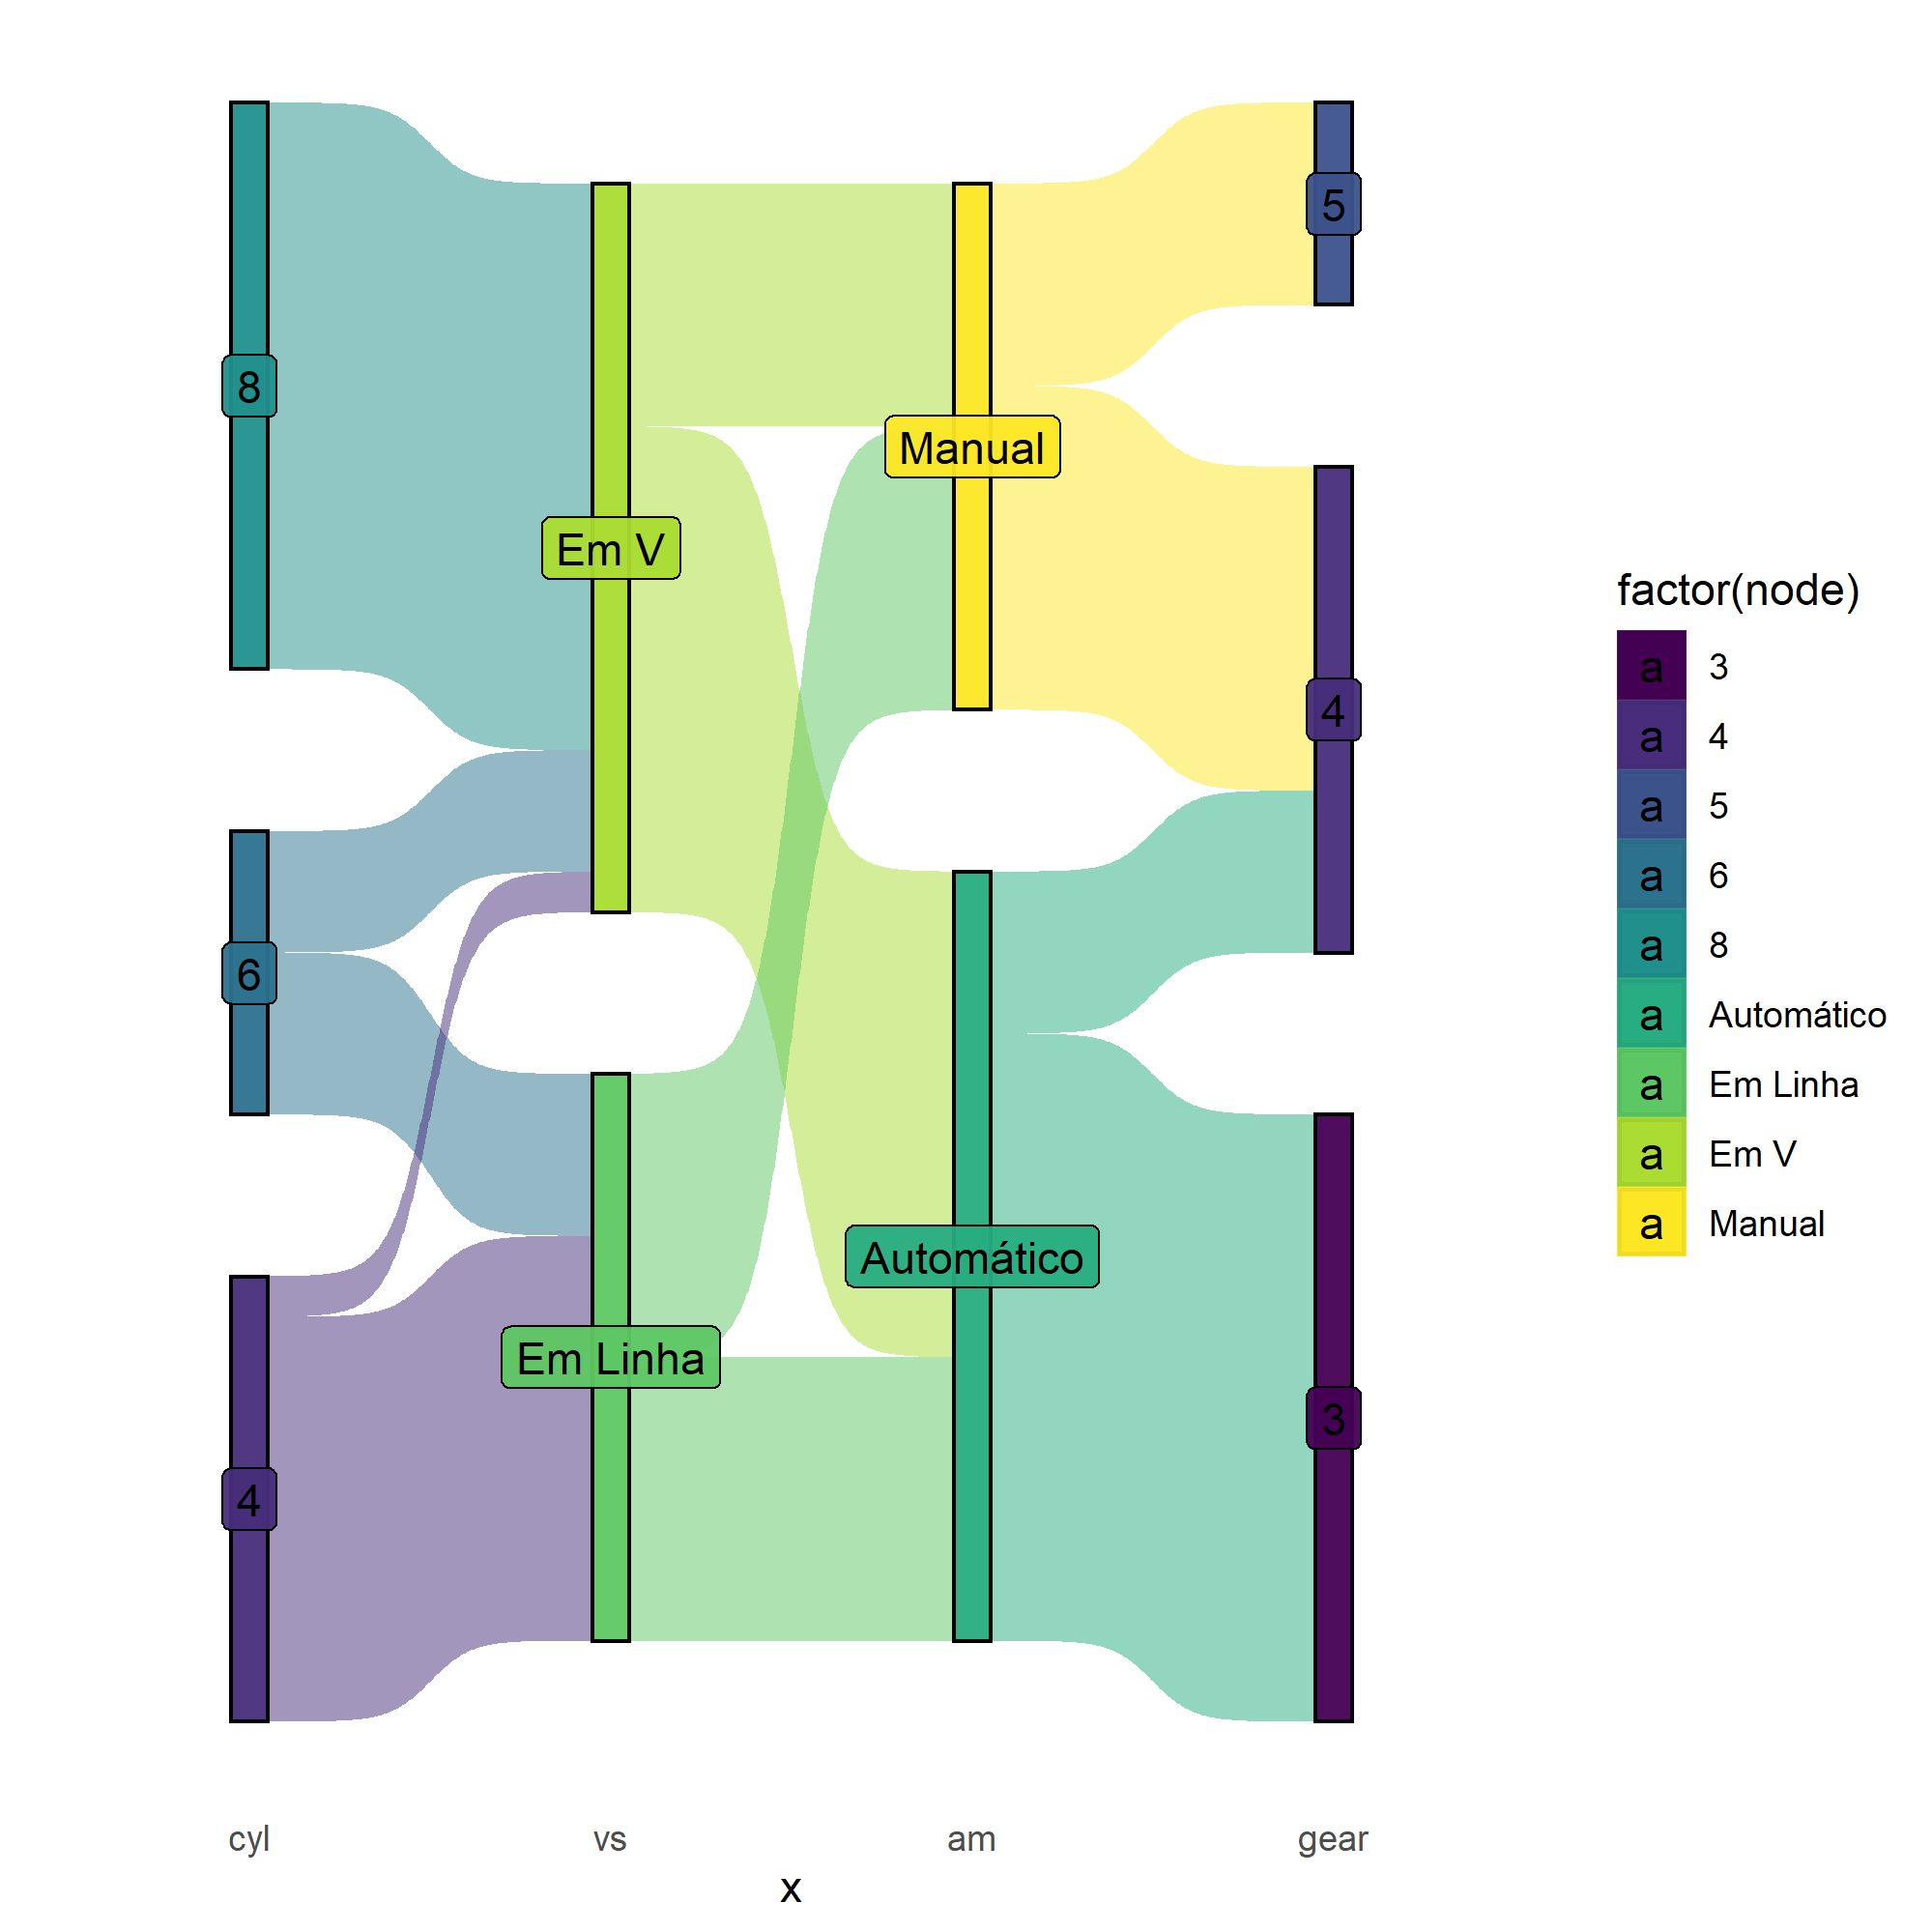

In [3]:
Image("./imagens/Sankey.png")

O gráfico acima mostra a relação entre variáveis do pacote ***mtcars***.

A primeira faixa (***cyl***) representa o número de cilindros (4, 6, 8). É possível notar que há mais carros equipados com motores de 8 cilindros se comparados com 4 ou 6 cilindros. Seguindo o fluxo, percebe-se que todos os carros com motores e 8 cilindros tem motor em V, já os carros de 6 cilindros se dividem entre motores em V e em linha. Os motores de 4 cilindros são majoritariamente construídos em linha, mas há motores em V.

Seguindo o diagrama, temos a divisão entre câmbios automáticos e manuais. Os carros com motores em V são na sua maioria automáticos, já os em linha tem uma divisão equilibrada entre câmbios manuais e automáticos.

O próximo passo analisa a quantidade de marchas (excluindo a marcha ré). Os carros automáticos têm na sua maioria 3 marchas, alguns com 4 e não há carros automáticos com 5. Já entre manuais não há veículos com 3 marchas, apenas opções com 4 ou 5 marchas.